In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from pylab import rcParams
pd.set_option('display.max_columns',None) 

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.shape

(129880, 23)

In [6]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
print('Mean of Arrival delay in minutes',df['Arrival Delay in Minutes'].mean())
print('Median of Arrival delay in minutes',df['Arrival Delay in Minutes'].median()) 

Mean of Arrival delay in minutes 15.09112883918849
Median of Arrival delay in minutes 0.0


Since the median is 0 we will replace all the null values in this column to mean. 

In [8]:
df['satisfaction'].value_counts(1)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

## Replacing the Airline Delay null values to mean

In [9]:
Arrival_Mean = df['Arrival Delay in Minutes'].mean() 
Arrival_Mean

15.09112883918849

In [10]:
Depature_Mean = df['Departure Delay in Minutes'].mean() 
Depature_Mean

14.713712657838004

In [11]:
df['Arrival Delay in Minutes'].replace(np.nan,Arrival_Mean,inplace = True) 

In [12]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

<AxesSubplot:>

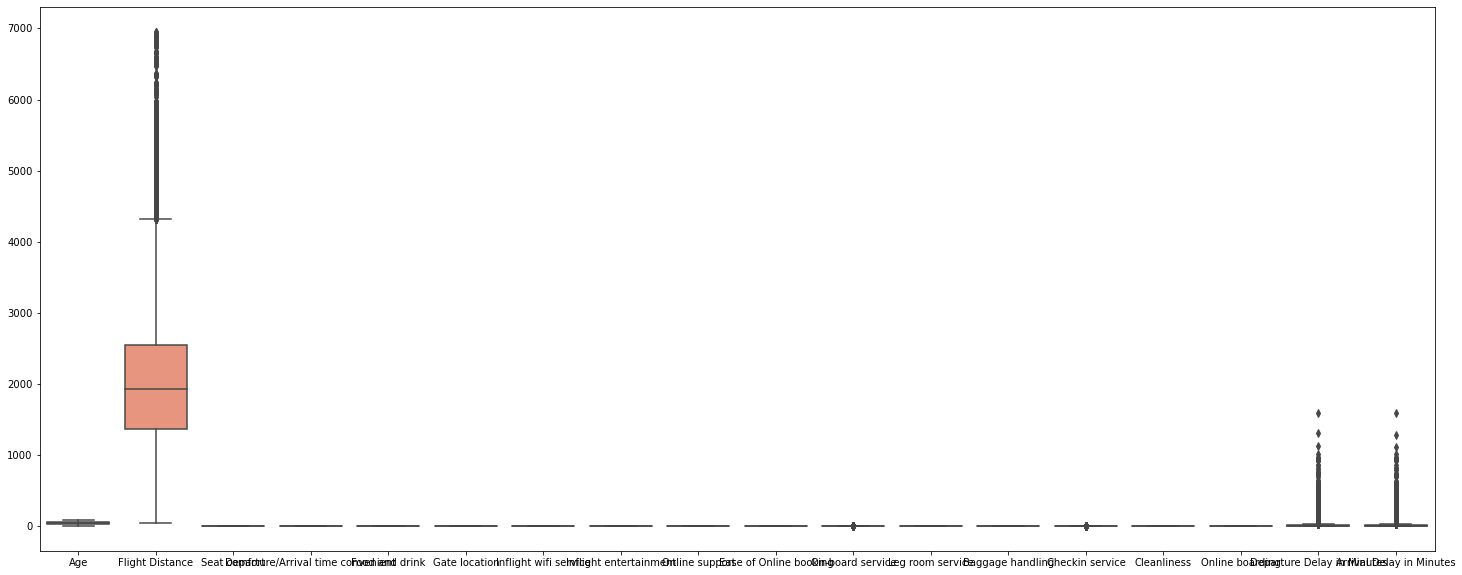

In [13]:
plt.figure(figsize=(25,10)) 
sns.boxplot(data=df) 

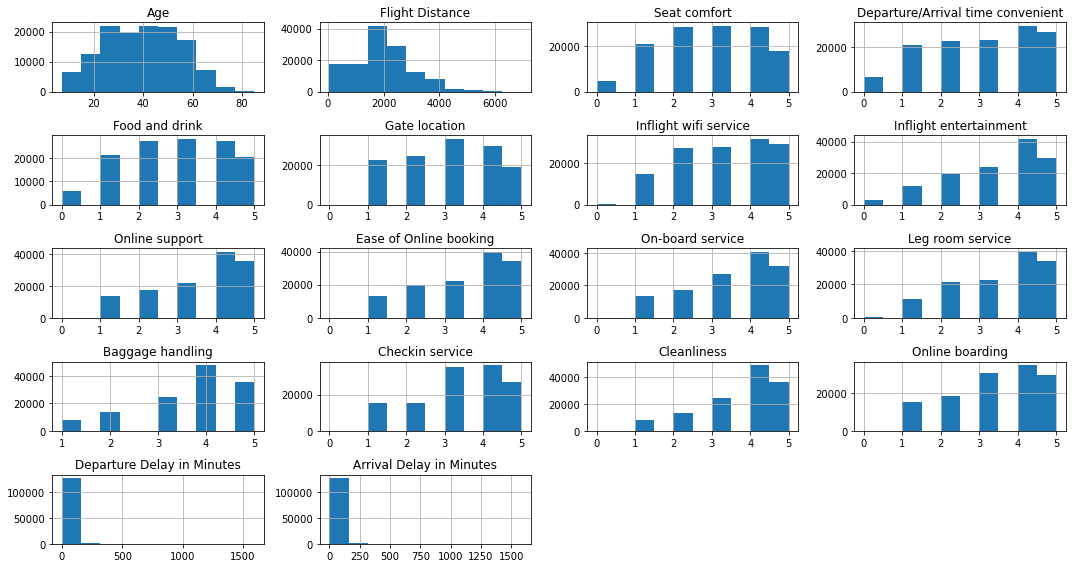

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.hist()
plt.tight_layout();

In [15]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

satisfaction
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


Gender
Female    65899
Male      63981
Name: Gender, dtype: int64


Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


Type of Travel
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


Class
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64




In [16]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))



feature: satisfaction
['satisfied', 'dissatisfied']
Categories (2, object): ['dissatisfied', 'satisfied']


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


feature: Customer Type
['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']


feature: Type of Travel
['Personal Travel', 'Business travel']
Categories (2, object): ['Business travel', 'Personal Travel']


feature: Class
['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']


In [17]:
## Checking for duplicates
dups = df.duplicated()
dups.sum()

0

In [18]:
cat_col=df.select_dtypes(include=['object','category']).columns.tolist()
num_col=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [19]:
cat_col

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [20]:
num_col

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [21]:
categorical_data = df.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(5)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [22]:
df['Class']

0              Eco
1         Business
2              Eco
3              Eco
4              Eco
            ...   
129875         Eco
129876    Business
129877         Eco
129878         Eco
129879         Eco
Name: Class, Length: 129880, dtype: object

In [23]:
numeric_data = df.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(5)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


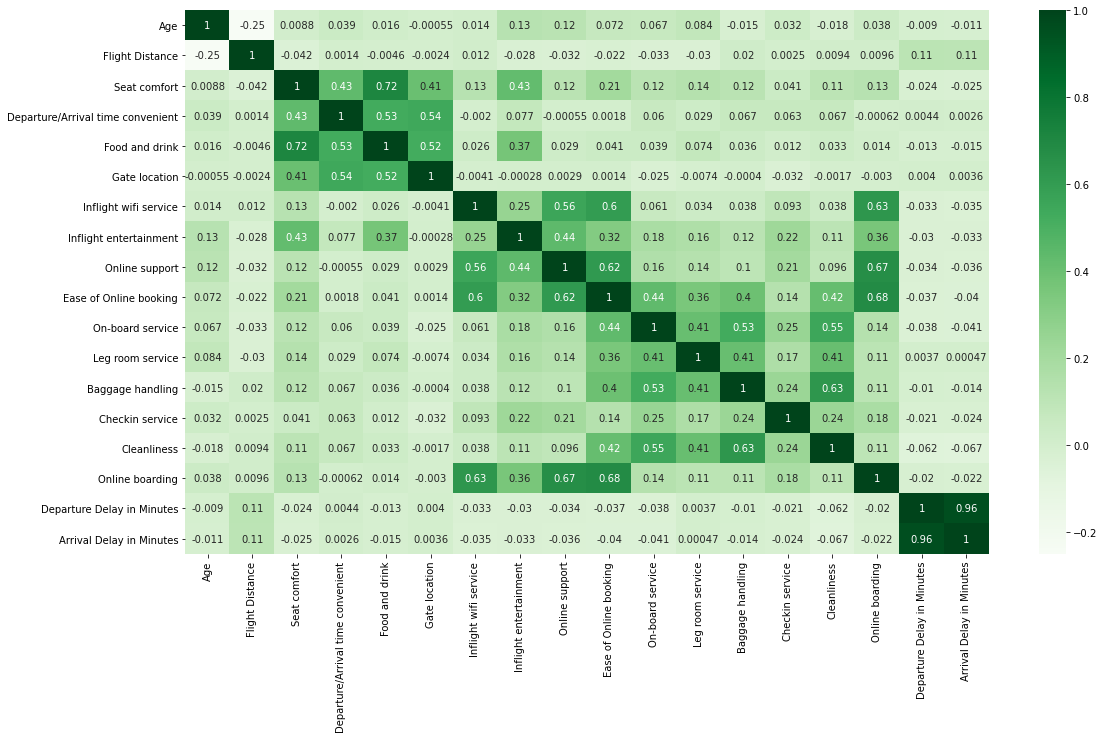

In [24]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens');

We can see above the heatmap. Here there is a co relation between Arrival delay and depature delay.So when a flight departs late it arrives late also. Another close co relatation is seat confort and food and drinks. 

## Univariate analysis.Checking the histogram to see the distribution of the data.

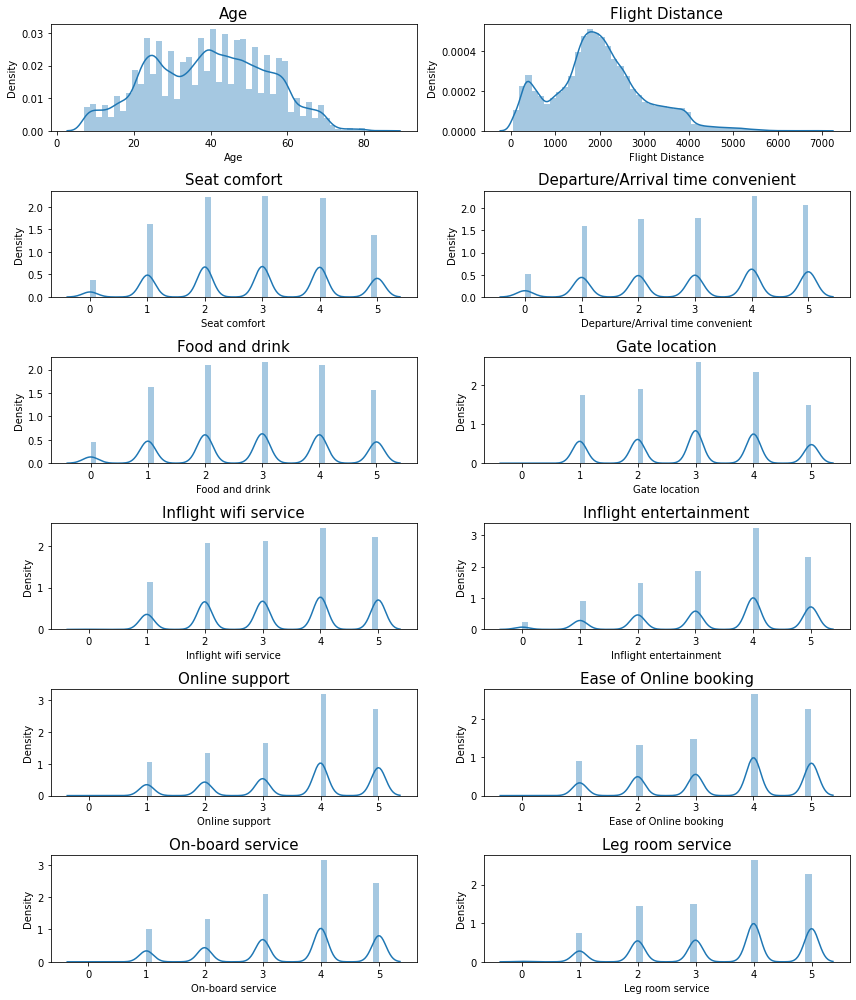

In [25]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=15)

a = sns.distplot(df['Flight Distance'] , ax=axes[0][1])
a.set_title("Flight Distance",fontsize=15)

a = sns.distplot(df['Seat comfort'] , ax=axes[1][0])
a.set_title("Seat comfort",fontsize=15)


a = sns.distplot(df['Departure/Arrival time convenient'] , ax=axes[1][1])
a.set_title("Departure/Arrival time convenient",fontsize=15)

a = sns.distplot(df['Food and drink'] , ax=axes[2][0])
a.set_title("Food and drink",fontsize=15)


a = sns.distplot(df['Gate location'] , ax=axes[2][1])
a.set_title("Gate location",fontsize=15)

a = sns.distplot(df['Inflight wifi service'] , ax=axes[3][0])
a.set_title("Inflight wifi service",fontsize=15)

a = sns.distplot(df['Inflight entertainment'] , ax=axes[3][1])
a.set_title("Inflight entertainment",fontsize=15)

a = sns.distplot(df['Online support'] , ax=axes[4][0])
a.set_title("Online support",fontsize=15)

a = sns.distplot(df['Ease of Online booking'] , ax=axes[4][1])
a.set_title("Ease of Online booking",fontsize=15)

a = sns.distplot(df['On-board service'] , ax=axes[5][0])
a.set_title("On-board service",fontsize=15)

a = sns.distplot(df['Leg room service'] , ax=axes[5][1])
a.set_title("Leg room service",fontsize=15)


plt.tight_layout()
plt.show()

Shape After Outliers Treatment (129880, 23)


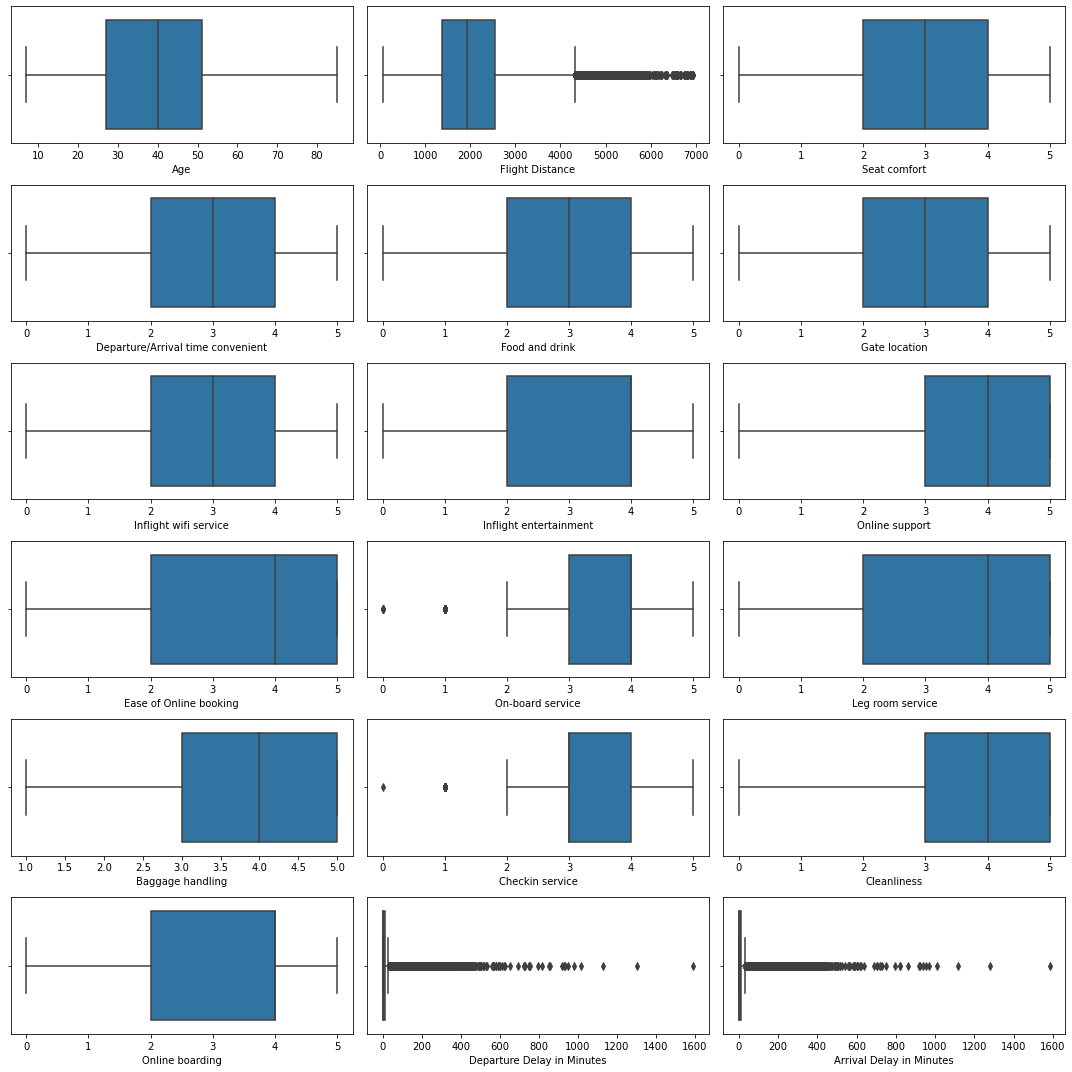

In [26]:
## Finding Outliers
data_plot=df[['Age','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location',
 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
 'Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',df.shape)

We can see above that the below variable are having some outliers in the data:

1) Flight Distrance

2) On Board service

3) Check in service

4) Depature delay in minutes

5) Arrival Delay in minutes

However, for on board and check in service we cannot say that those are outliers because there can be some customers who can give the rating as 0 or 1 respectively. So i wont be treating these two variables for outlier treatment. 

## Outlier Treatment

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
lr,ur=remove_outlier(df['Flight Distance'])
df['Flight Distance']=np.where(df['Flight Distance']>ur,ur,df['Flight Distance'])
df['Flight Distance']=np.where(df['Flight Distance']<lr,lr,df['Flight Distance'])

lr,ur=remove_outlier(df['Departure Delay in Minutes'])
df['Departure Delay in Minutes']=np.where(df['Departure Delay in Minutes']>ur,ur,df['Departure Delay in Minutes'])
df['Departure Delay in Minutes']=np.where(df['Departure Delay in Minutes']<lr,lr,df['Departure Delay in Minutes'])

lr,ur=remove_outlier(df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes']=np.where(df['Arrival Delay in Minutes']>ur,ur,df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes']=np.where(df['Arrival Delay in Minutes']<lr,lr,df['Arrival Delay in Minutes'])

df.shape

(129880, 23)

## Checking Outliers after the Treatment

Shape After Outliers Treatment (129880, 23)


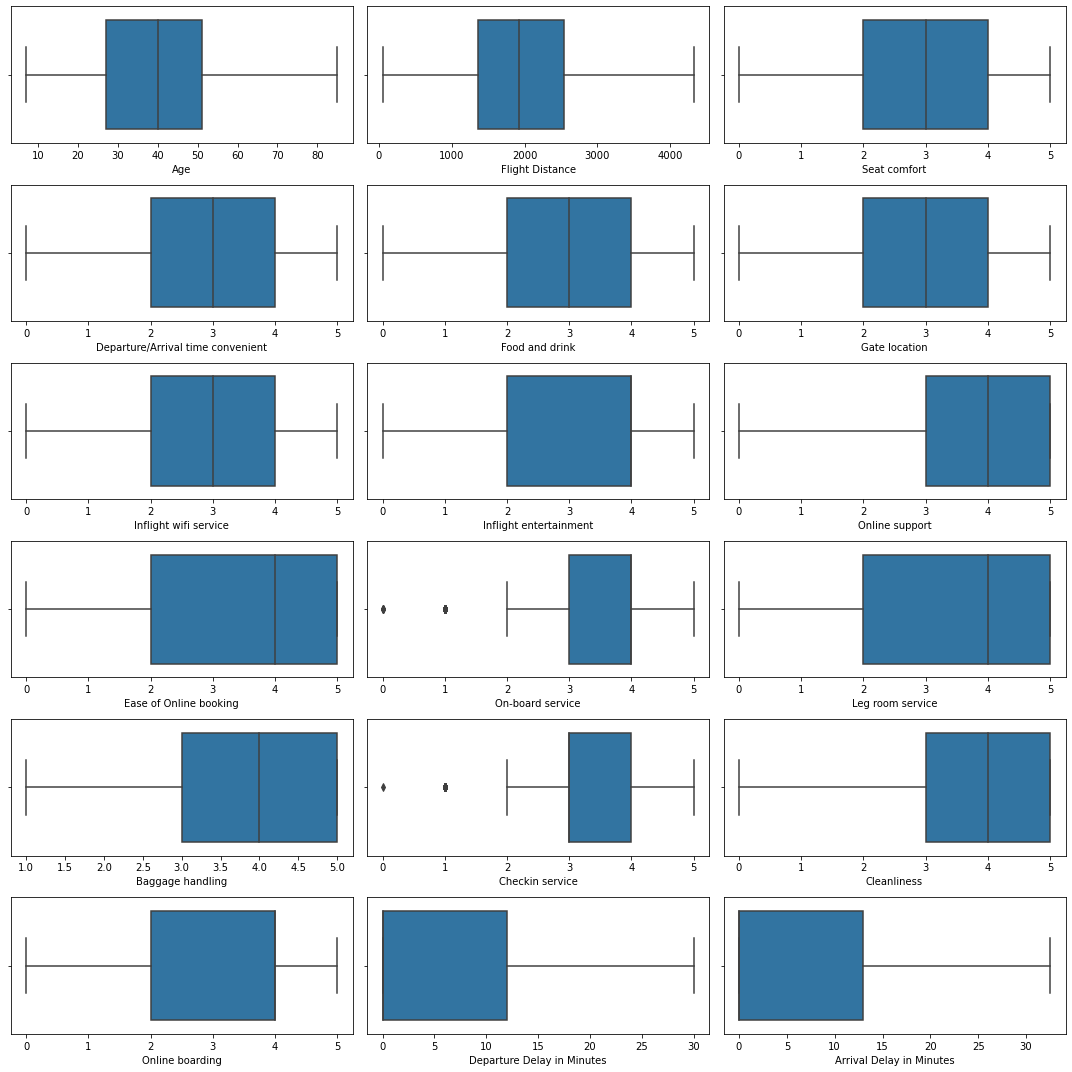

In [29]:
data_plot=df[['Age','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location',
 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
 'Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',df.shape)

We can see that Depature delay in minutes, Flight distance and arrival delay in minutes are treated with IQR method for outliers.

In [30]:
df['Arrival Delay in Minutes'].mean()

7.9550493812272745

After the outlier treatment the mean of arrival and depature are the same as before treament so there is no significant change in the data set.

We can also continue with out treating for oulier because there can be situation where these flights were actually delayed for too long and those are counted as outliers here. Only if we have more information about the data we can know if they are outliers of actual data. 

In [31]:
df= pd.get_dummies(df, prefix=['Gender','Customer Type','Type of Travel'], 
                        columns=['Gender','Customer Type','Type of Travel'],drop_first=True) 

In [32]:
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,satisfied,65,Eco,265.0,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.0,0.0,0,0,1
1,satisfied,47,Business,2464.0,0,0,0,3,0,2,2,3,4,4,4,2,3,2,30.0,32.5,1,0,1
2,satisfied,15,Eco,2138.0,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.0,0.0,0,0,1
3,satisfied,60,Eco,623.0,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.0,0.0,0,0,1
4,satisfied,70,Eco,354.0,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.0,0.0,0,0,1


In [33]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: satisfaction
['satisfied', 'dissatisfied']
Categories (2, object): ['dissatisfied', 'satisfied']
[1 0]


feature: Class
['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']
[1 0 2]


In [34]:
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265.0,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.0,0.0,0,0,1
1,1,47,0,2464.0,0,0,0,3,0,2,2,3,4,4,4,2,3,2,30.0,32.5,1,0,1
2,1,15,1,2138.0,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.0,0.0,0,0,1
3,1,60,1,623.0,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.0,0.0,0,0,1
4,1,70,1,354.0,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.0,0.0,0,0,1


<AxesSubplot:xlabel='satisfaction', ylabel='Cleanliness'>

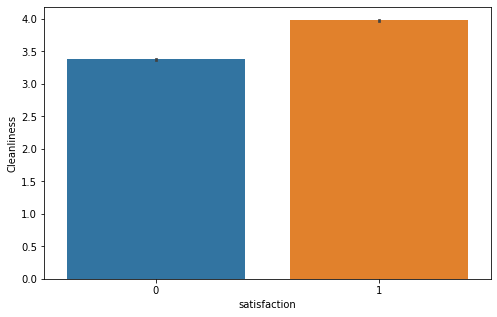

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(df['satisfaction'],df['Cleanliness'])

<AxesSubplot:xlabel='satisfaction', ylabel='Inflight entertainment'>

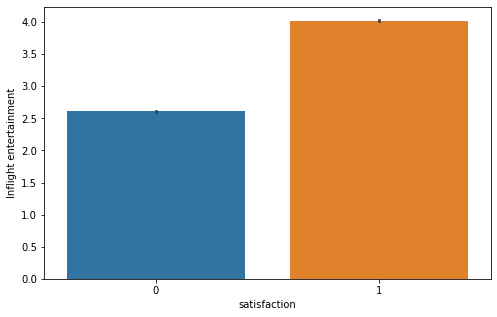

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(df['satisfaction'],df['Inflight entertainment']) 

<AxesSubplot:xlabel='satisfaction', ylabel='Inflight wifi service'>

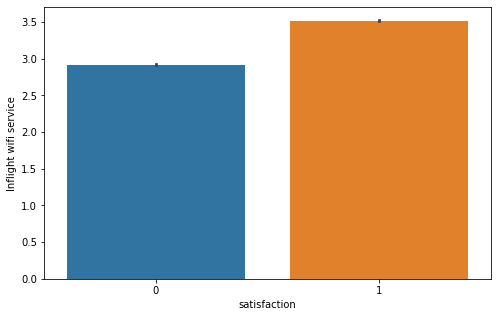

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(df['satisfaction'],df['Inflight wifi service']) 

## Splitting the data into train and test

In [38]:
X = df.drop(['satisfaction'], axis=1)
y = df[['satisfaction']] 

We are going to split the data into train and test. X will have all the variables except the target variable which is satisfaction. Y will have only the target variable. 

In [39]:
#X = pd.DataFrame(X,columns=X.columns)

## Scaling the X 

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

We will do scaling so that all the variable will be in same magnitude of values. We will scale only the independent variable. 

In [41]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [42]:
X_scaled.head()

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1.691351,0.653608,-1.713912,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.658418,-0.664603,-0.985340,-0.473422,1.493951
1,0.500820,-0.955724,0.496874,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,2.017790,2.050602,1.014878,-0.473422,1.493951
2,-1.615680,0.653608,0.169127,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.658418,-0.664603,-0.985340,-0.473422,1.493951
3,1.360648,0.653608,-1.353993,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.658418,-0.664603,-0.985340,-0.473422,1.493951
4,2.022054,0.653608,-1.624435,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.658418,-0.664603,-0.985340,-0.473422,1.493951


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.30, random_state=1)

Here we have split the variables into train and test variable into 70:30 ratio. 70% for the training and 30% we will test the trained data.

In [44]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (90916, 22)
X test shape (38964, 22)
y train shape (90916, 1)
y test shape (38964, 1)


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Decison Tree

In [46]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [20,60,100],
    'min_samples_leaf': [10,20,30], 
    'min_samples_split': [30,60,90],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5) 

In [47]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 60, 'min_samples_leaf': 10, 'min_samples_split': 30}


DecisionTreeClassifier(max_depth=60, min_samples_leaf=10, min_samples_split=30,
                       random_state=1)

In [48]:
cart_train_acc=best_grid.score(X_train,y_train) 
cart_train_acc

0.9606449909806855

In [49]:
cart_test_acc=best_grid.score(X_test,y_test) 
cart_test_acc

0.943075659583205

In [50]:
cart_train_acc=best_grid.score(X_train,y_train) 
cart_train_acc

0.9606449909806855

In [51]:
cart_test_acc=best_grid.score(X_test,y_test) 
cart_test_acc

0.943075659583205

In [52]:
from sklearn import metrics
y_train_predict = best_grid.predict(X_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[39570  1523]
 [ 2055 47768]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     41093
           1       0.97      0.96      0.96     49823

    accuracy                           0.96     90916
   macro avg       0.96      0.96      0.96     90916
weighted avg       0.96      0.96      0.96     90916



In [53]:
y_test_predict = best_grid.predict(X_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[16729   971]
 [ 1247 20017]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17700
           1       0.95      0.94      0.95     21264

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [54]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                                        Imp
Inflight entertainment             0.434429
Seat comfort                       0.200612
Ease of Online booking             0.068763
Customer Type_disloyal Customer    0.049737
Type of Travel_Personal Travel     0.041186
Gate location                      0.023674
Class                              0.023226
Gender_Male                        0.018143
Checkin service                    0.017323
Departure/Arrival time convenient  0.017253
Online support                     0.016025
Leg room service                   0.012424
Baggage handling                   0.012255
Age                                0.012229
Flight Distance                    0.011910
Cleanliness                        0.011108
Online boarding                    0.007667
Food and drink                     0.006871
On-board service                   0.004938
Arrival Delay in Minutes           0.004468
Departure Delay in Minutes         0.003654
Inflight wifi service           

## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [10], 
    'max_features': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [10],  
    'n_estimators': [25,50] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [78]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=50, random_state=1)

In [79]:
Random_train_acc=best_grid.score(X_train,y_train) 
Random_train_acc

0.9417594262836024

In [80]:
Random_test_acc=best_grid.score(X_test,y_test) 
Random_test_acc

0.937814392772816

In [81]:
from sklearn import metrics
y_train_predict = best_grid.predict(X_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[38492  2601]
 [ 2694 47129]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     41093
           1       0.95      0.95      0.95     49823

    accuracy                           0.94     90916
   macro avg       0.94      0.94      0.94     90916
weighted avg       0.94      0.94      0.94     90916



In [82]:
y_test_predict = best_grid.predict(X_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[16537  1163]
 [ 1260 20004]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17700
           1       0.95      0.94      0.94     21264

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [83]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                                        Imp
Inflight entertainment             0.339053
Seat comfort                       0.172198
Ease of Online booking             0.105344
Online support                     0.066842
Customer Type_disloyal Customer    0.042517
Food and drink                     0.030886
On-board service                   0.027971
Gender_Male                        0.026412
Leg room service                   0.026048
Type of Travel_Personal Travel     0.024321
Online boarding                    0.024308
Class                              0.022523
Inflight wifi service              0.014542
Checkin service                    0.014207
Cleanliness                        0.013368
Departure/Arrival time convenient  0.011427
Flight Distance                    0.009638
Baggage handling                   0.009127
Gate location                      0.008773
Age                                0.006850
Arrival Delay in Minutes           0.002265
Departure Delay in Minutes      